In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures

In [2]:
times_list = [str(3600 * (i + 1)) for i in range(6)]
area_one_length = 9

In [3]:
from collections import namedtuple
ARGS_FOR_LIST = namedtuple('FOR_LIST', ('dir', 'ratio', 'seed', 'csv'))

def get_for_list(csv=None):
    dir_list = ['p10000', 'p20000', 'p30000']
    ratio_list = ['r4', 'r5', 'r6']
    seed_list = ['s'+str(123 + i) for i in range(1)]
    csv_list = ['census', 'mobile', 'od']
    if csv is not None:
        csv_list = csv

    return ARGS_FOR_LIST(dir_list, ratio_list, seed_list, csv_list)

In [4]:
def get_read_path(name):
    path = '/Users/kessapassa/OneDrive/research_log/20190402/' + name + '/'
    return path

def get_file_name(args):
    return args.dir + args.ratio + args.seed + '_' + args.csv + '.csv'

def get_full_path(name, args):
    return get_read_path(name) + get_file_name(args)

In [5]:
def for_default_init(func, array):
    for_list = get_for_list()
    
    for _dir in for_list.dir:
        array[_dir] = {}
        
        for _ratio in for_list.ratio:
            array[_dir][_ratio] = {}
            
            for _seed in for_list.seed:
                array[_dir][_ratio][_seed] = {}
                
                for _csv in for_list.csv:
                    array[_dir][_ratio][_seed][_csv] = {}
                    args = ARGS_FOR_LIST(_dir, _ratio, _seed, _csv)
                    func(args, array)

In [6]:
csv_array = {}
def main(args, array):
    df = pd.read_csv(get_full_path('2D', args), 
                     encoding='Shift_JISx0213')
    array[args.dir][args.ratio][args.seed][args.csv] = df

for_default_init(main, csv_array)

In [7]:
target1 = 'mobile'
target2 = 'census'

# 全体の回帰直線

https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1　　

よりR2はxに実測値、yに真値

なのでここでのR2算出方法は間違っている　　

p10000 r4 s123
p10000 r5 s123
p10000 r6 s123
p20000 r4 s123
p20000 r5 s123
p20000 r6 s123
p30000 r4 s123
p30000 r5 s123
p30000 r6 s123


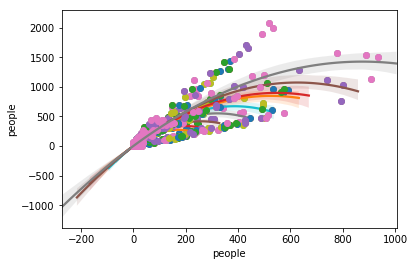

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

p_array = []
corr_array = []
r2_array = []

for_list = get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:
                
            df = csv_array[_dir][_ratio][_seed].copy()
            trainX = df[target1]['people'] 
            trainY = df[target2]['people']

            # plt.figure(dpi=600)
            plt.plot(trainX, trainY, 'o')

            order=2
            sns.regplot(x=trainX, y=trainY, order=order, ci=75)
            z = np.polyfit(trainX, trainY, order)
            z = np.squeeze(z)
            p = np.poly1d(z)
        #     print('y = ', p)
            corr = np.corrcoef(trainX, trainY)[0,1]
            r2 = r2_score(trainX, trainY)
#             print('相関 = ', round(corr, 4))
            print(_dir, _ratio, _seed)
            p = np.asanyarray(p)
            p_array.append(p)
            corr_array.append(corr)
            r2_array.append(r2)

            x = trainX
            y = p[0]*x**2 + p[1]*x + p[2]


            # plt.savefig('correlation_{0}.png'.format(people))

0.8366037218289161


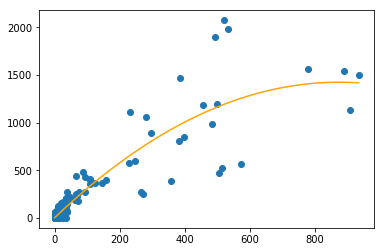

In [22]:
_dir = 'p30000'
_ratio = 'r6'
_seed = 's123'

df = csv_array[_dir][_ratio][_seed].copy()
trainX = df[target1]['people'].values.reshape(-1, 1)
trainY = df[target2]['people'].values.reshape(-1, 1)

quadratic = PolynomialFeatures(degree = 2)
X_quad = quadratic.fit_transform(trainX)
X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
model = LR()

# 2次の項を追加、予測値、R^2を評価
mod_quad = model.fit(X_quad, trainY)
y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
r2_quad = model.score(X_quad, trainY)

# plt.figure(dpi=600)
plt.scatter(trainX, trainY)
plt.plot(X_fit, y_quad_fit, 'orange')
print(r2_quad)

# plt.savefig('correlation_{0}.png'.format(_dir+_ratio+_seed))

In [ ]:
# xとy両方とも0の値を削除
def remove_dual_zeros(x_array, y_array):
    new_x_array = []
    new_y_array = []
    
    for x, y in zip(x_array, y_array):
        if x == 0 and y == 0:
            continue
        else:
            new_x_array.append(x)
            new_y_array.append(y)

    return pd.Series(new_x_array), pd.Series(new_y_array)

In [ ]:
# _dir = 'p30000'
# _ratio = 'r6'
# _seed = 's123'

# df = csv_array[_dir][_ratio][_seed].copy()
# trainX = df[target1]['people'] 
# trainY = df[target2]['people']
# # trainX, trainY = remove_dual_zeros(trainX, trainY)


# # plt.figure(dpi=600)
# plt.plot(trainX, trainY, 'o')

# order=2
# sns.regplot(x=trainX, y=trainY, order=order, ci=75)
# z = np.polyfit(trainX, trainY, order)
# z = np.squeeze(z)
# p = np.poly1d(z)
# print(_dir, _ratio, _seed)
# print('y = ', p)
# corr = np.corrcoef(trainX, trainY)[0,1]
# r2 = r2_score(trainX, trainY)
# print('相関 = ', round(corr, 3))
# print('R^2 = ', round(r2, 3))
# p = np.asanyarray(p)

# x = trainX
# y = p[0]*x**2 + p[1]*x + p[2]

In [ ]:
from sklearn.linear_model import LinearRegression as LR
def show_score(x, y):
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)
    model = LR()
    model.fit(x, y)
    score = model.score(x, y)
    print(score)
    
    return x, y

In [ ]:
score_array = []
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:
            df = csv_array[_dir][_ratio][_seed].copy()
            trainX = df[target1]['people'].values.reshape(-1, 1)
            trainY = df[target2]['people'].values.reshape(-1, 1)

            model = LR()
            model.fit(trainX, trainY)            
            score = model.score(trainX, trainY)
            score_array.append(score)

In [ ]:
p_array

In [ ]:
corr_array

In [ ]:
r2_array

In [ ]:
score_array

In [ ]:
tmp = 0
for score in score_array:
    tmp += score
tmp/len(score_array)

In [ ]:
csv_array_3d = {}
def create3d(args, array):
    df = pd.read_csv(get_full_path('2D', args), 
                     encoding='Shift_JISx0213')
    df['time'] = df['time'].apply(lambda x: str(int(x)))
    group_list = df.groupby(['time'], sort=False)
    for _times, _group in group_list:
#         df = convert_area_to_contour(base.copy(), _group.copy())
        df = df.sort_index(ascending=False)
        array[args.dir][args.ratio][args.seed][args.csv][_times] = _group

for_default_init(create3d, csv_array_3d)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
import seaborn as sns

for_list = get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:
            for _times in times_list:
                df = csv_array_3d[_dir][_ratio][_seed].copy()
                trainX = df[target1][_times]['people'].copy()
                trainY = df[target2][_times]['people'].copy()

                # plt.figure(dpi=600)
                plt.plot(trainX, trainY, 'o')

                order=2
                sns.regplot(x=trainX, y=trainY, order=order, ci=0)
                z = np.polyfit(trainX, trainY, order)
                z = np.squeeze(z)
                p = np.poly1d(z)
            #     print('y = ', p)
                corr = np.corrcoef(trainX, trainY)[0,1]
#                 print('相関 = ', round(corr, 4))

                trainX = trainX.values.reshape(-1, 1)
                trainY = trainY.values.reshape(-1, 1)
                model = LR()
                model.fit(trainX, trainY)            
                score = model.score(trainX, trainY)
                
                print(_dir, _ratio, _seed, _times, ' [R^2 = ', round(score, 3), ']')
                p = np.asanyarray(p)

                x = trainX
                y = p[0]*x**2 + p[1]*x + p[2]


                # plt.savefig('correlation_{0}.png'.format(people))

参考: http://tekenuko.hatenablog.com/entry/2016/09/19/193520

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

score_array = []
for_list = get_for_list()
for _dir in for_list.dir:
    for _ratio in for_list.ratio:
        for _seed in for_list.seed:

            df = csv_array[_dir][_ratio][_seed].copy()
            trainX = df[target1]['people'].values.reshape(-1, 1)
            trainY = df[target2]['people'].values.reshape(-1, 1)

            quadratic = PolynomialFeatures(degree = 2)
            X_quad = quadratic.fit_transform(trainX)
            X_fit = np.arange(trainX.min(), trainX.max(), 1)[:, np.newaxis]
            model = LR()

            # 2次の項を追加、予測値、R^2を評価
            mod_quad = model.fit(X_quad, trainY)
            y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
            r2_quad = model.score(X_quad, trainY)
            score_array.append(r2_quad)

            plt.scatter(trainX, trainY, color = 'lightgray')
            plt.plot(X_fit, y_quad_fit, 'r')
            print(r2_quad)

In [ ]:
tmp = 0
for score in score_array:
    tmp += score
tmp/len(score_array)